<a href="https://colab.research.google.com/github/nurshat-ababakirov/bishkek-weather-1950-2025/blob/main/Bishkek_eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-misc
!pip install plotnine


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.0/189.0 kB 7.8 MB/s eta 0:00:00


In [34]:
from IPython.display import display, Markdown
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import seaborn as sns
import textwrap
import pandas as pd
import io
from google.colab import files
import numpy as np

In [3]:
bishkek = files.upload()

Saving bishkek.csv to bishkek.csv


In [10]:
bishkek_df = pd.read_csv(io.BytesIO(bishkek['bishkek.csv']))

In [11]:
bishkek_df.head()


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DEWP,DEWP_ATTRIBUTES,FRSHTT,FRSHTT_ATTRIBUTES,...,SNDP,SNDP_ATTRIBUTES,STP,STP_ATTRIBUTES,TEMP,TEMP_ATTRIBUTES,VISIB,VISIB_ATTRIBUTES,WDSP,WDSP_ATTRIBUTES
0,38353099999,"BISHKEK, KG",42.85,74.533333,760.0,1948-01-25,9999.9,0,0,NaN,...,999.9,NaN,999.9,0,19.0,4,2.8,4,2.5,4
1,38353099999,"BISHKEK, KG",42.85,74.533333,760.0,1948-04-10,9999.9,0,0,NaN,...,999.9,NaN,999.9,0,54.0,4,15.5,4,3.5,4
2,38353099999,"BISHKEK, KG",42.85,74.533333,760.0,1948-06-27,9999.9,0,0,NaN,...,999.9,NaN,999.9,0,71.7,4,17.1,4,3.8,4
3,38353099999,"BISHKEK, KG",42.85,74.533333,760.0,1948-06-28,9999.9,0,0,NaN,...,999.9,NaN,999.9,0,75.8,5,8.4,4,2.4,5
4,38353099999,"BISHKEK, KG",42.85,74.533333,760.0,1949-07-04,9999.9,0,0,NaN,...,999.9,NaN,999.9,0,72.3,4,17.1,4,3.5,4


In [17]:
bishkek_df.replace([9999.9, 999.9, 99.99, 999.0], pd.NA, inplace=True)
bishkek_df['DATE'] = pd.to_datetime(bishkek_df['DATE'])

In [18]:
df = bishkek_df[['DATE', 'STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'TEMP', 'MAX', 'MIN', 'PRCP', 'SNDP', 'GUST', 'FRSHTT']].copy()
df.rename(columns={
    'TEMP': 'MeanTempF',
    'MAX': 'MaxTempF',
    'MIN': 'MinTempF',
    'PRCP': 'PrecipIn',
    'SNDP': 'SnowDepthIn',
    'GUST': 'GustSpeed',
    'FRSHTT': 'WeatherCode'
}, inplace=True)

In [19]:
df['Year'] = df['DATE'].dt.year
df['Month'] = df['DATE'].dt.month

In [20]:
df.head()

,DATE,STATION,NAME,LATITUDE,LONGITUDE,MeanTempF,MaxTempF,MinTempF,PrecipIn,SnowDepthIn,GustSpeed,WeatherCode,Year,Month
0,1948-01-25,38353099999,"BISHKEK, KG",42.85,74.533333,19.0,27.0,16.0,0.0,<NA>,<NA>,0,1948,1
1,1948-04-10,38353099999,"BISHKEK, KG",42.85,74.533333,54.0,59.0,46.0,0.0,<NA>,<NA>,0,1948,4
2,1948-06-27,38353099999,"BISHKEK, KG",42.85,74.533333,71.7,81.0,59.0,0.0,<NA>,<NA>,0,1948,6
3,1948-06-28,38353099999,"BISHKEK, KG",42.85,74.533333,75.8,86.0,55.0,0.0,<NA>,<NA>,0,1948,6
4,1949-07-04,38353099999,"BISHKEK, KG",42.85,74.533333,72.3,84.0,64.0,0.0,<NA>,<NA>,0,1949,7


In [21]:
# Converting Fahrenheit to Celsius
df['MeanTempC'] = (df['MeanTempF'] - 32) * 5 / 9
df['MaxTempC'] = (df['MaxTempF'] - 32) * 5 / 9
df['MinTempC'] = (df['MinTempF'] - 32) * 5 / 9

# Converting Inches to Centimeters
df['PrecipCm'] = df['PrecipIn'] * 2.54
df['SnowDepthCm'] = df['SnowDepthIn'] * 2.54

# Converting Knots to Meters per Second
df['GustSpeed_ms'] = df['GustSpeed'] * 0.514444

# Decoding Weather Code
df['WeatherCode'] = df['WeatherCode'].astype(str).str.zfill(6)

#Creating Boolean columns for each event
df['Fog'] = (df['WeatherCode'].str[0] == '1').astype(int)
df['Rain'] = (df['WeatherCode'].str[1] == '1').astype(int)
df['Snow'] = (df['WeatherCode'].str[2] == '1').astype(int)
df['Hail'] = (df['WeatherCode'].str[3] == '1').astype(int)
df['Thunder'] = (df['WeatherCode'].str[4] == '1').astype(int)
df['Tornado'] = (df['WeatherCode'].str[5] == '1').astype(int)

In [22]:
df.drop(columns=['WeatherCode'], inplace=True)

In [23]:
df.head()

,DATE,STATION,NAME,LATITUDE,LONGITUDE,MeanTempF,MaxTempF,MinTempF,PrecipIn,SnowDepthIn,...,MinTempC,PrecipCm,SnowDepthCm,GustSpeed_ms,Fog,Rain,Snow,Hail,Thunder,Tornado
0,1948-01-25,38353099999,"BISHKEK, KG",42.85,74.533333,19.0,27.0,16.0,0.0,<NA>,...,-8.888889,0.0,<NA>,<NA>,0,0,0,0,0,0
1,1948-04-10,38353099999,"BISHKEK, KG",42.85,74.533333,54.0,59.0,46.0,0.0,<NA>,...,7.777778,0.0,<NA>,<NA>,0,0,0,0,0,0
2,1948-06-27,38353099999,"BISHKEK, KG",42.85,74.533333,71.7,81.0,59.0,0.0,<NA>,...,15.0,0.0,<NA>,<NA>,0,0,0,0,0,0
3,1948-06-28,38353099999,"BISHKEK, KG",42.85,74.533333,75.8,86.0,55.0,0.0,<NA>,...,12.777778,0.0,<NA>,<NA>,0,0,0,0,0,0
4,1949-07-04,38353099999,"BISHKEK, KG",42.85,74.533333,72.3,84.0,64.0,0.0,<NA>,...,17.777778,0.0,<NA>,<NA>,0,0,0,0,0,0


In [25]:
df['Month'] = df['DATE'].dt.month

def assign_season(month, lat):
  if pd.isna(lat):
    return None
  if lat >= 0: #Northen Hemisphere
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df.apply(lambda row: assign_season(row['Month'], row['LATITUDE']), axis=1)

In [26]:
df.columns

Index(['DATE', 'STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'MeanTempF',
       'MaxTempF', 'MinTempF', 'PrecipIn', 'SnowDepthIn', 'GustSpeed', 'Year',
       'Month', 'MeanTempC', 'MaxTempC', 'MinTempC', 'PrecipCm', 'SnowDepthCm',
       'GustSpeed_ms', 'Fog', 'Rain', 'Snow', 'Hail', 'Thunder', 'Tornado',
       'Season'],
      dtype='object')

In [32]:
df['MeanTempC'] = pd.to_numeric(df['MeanTempC'], errors='coerce')
df['MaxTempC'] = pd.to_numeric(df['MaxTempC'], errors='coerce')
df['MinTempC'] = pd.to_numeric(df['MinTempC'], errors='coerce')


In [35]:
df_clean = df.dropna(subset=['DATE', 'MeanTempC', 'MaxTempC', 'MinTempC', 'Season'])

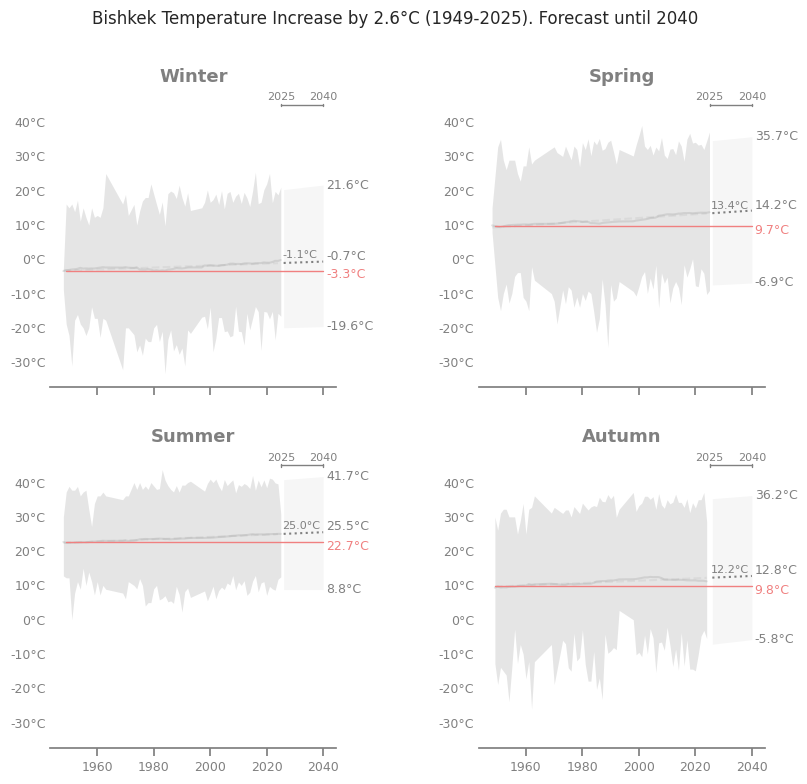

In [46]:
# Step 1: Group and aggregate
df_clean.loc[:, 'YEAR'] = df_clean['DATE'].dt.year
season_means = (
    df_clean.groupby(['Season', 'YEAR'])
    .agg({
        'MeanTempC': 'mean',     # seasonal average
        'MinTempC': 'min',       # coldest day
        'MaxTempC': 'max'        # hottest day
    })
    .reset_index()
    .rename(columns={'Season': 'SEASON'})
)

# Step 2: Rolling smoothing of mean temp
season_means['TEMP_SMOOTH'] = (
    season_means
    .groupby('SEASON')['MeanTempC']
    .transform(lambda x: x.rolling(window=20, center=True, min_periods=1).mean())
)

# Step 3: Trend summary
trend_params = []
for season in season_means['SEASON'].unique():
    sub = season_means[season_means['SEASON'] == season]
    slope, intercept = np.polyfit(sub['YEAR'], sub['TEMP_SMOOTH'], 1)
    trend_params.append({'SEASON': season, 'slope_C_per_year': slope, 'intercept': intercept})

trend_df = pd.DataFrame(trend_params)

season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
season_means['SEASON'] = pd.Categorical(season_means['SEASON'], categories=season_order, ordered=True)

# Step 4: Plotting
sns.set(style='ticks')
g = sns.FacetGrid(season_means, col='SEASON', col_wrap=2, height=4, sharey=True)

# Add custom lines (trend and forecast)
for ax, season in zip(g.axes.flatten(), season_means['SEASON'].cat.categories):
    sub = season_means[season_means['SEASON'] == season]
    sub_past = sub[sub['YEAR'] <= 2024]

    # --- FILL between min and max ---
    ax.fill_between(sub['YEAR'], sub['MinTempC'], sub['MaxTempC'],
                    color='grey', alpha=0.2, linewidth = 0, label='Temperature Range')

    # Mean smoothed line
    ax.plot(sub['YEAR'], sub['TEMP_SMOOTH'], color='grey', alpha=0.2, label='Average Temperature')

    # Trend to 2025
    slope, intercept = np.polyfit(sub_past['YEAR'], sub_past['TEMP_SMOOTH'], 1)
    ax.plot(sub_past['YEAR'], slope * sub_past['YEAR'] + intercept,
            color='grey', alpha=0.1, linestyle='--')

    # Forecast 2026–2040
    years_future = np.arange(2026, 2041)
    forecast = slope * years_future + intercept
    ax.plot(years_future, forecast, color='grey', linestyle=':')

    # Fit trend lines
    max_slope, max_intercept = np.polyfit(sub_past['YEAR'], sub_past['MaxTempC'], 1)
    min_slope, min_intercept = np.polyfit(sub_past['YEAR'], sub_past['MinTempC'], 1)

    # Predict future values
    max_forecast = max_slope * years_future + max_intercept
    min_forecast = min_slope * years_future + min_intercept

    # Plot forecast fill
    ax.fill_between(
        years_future,
        min_forecast,
        max_forecast,
        color='lightgrey',
        alpha=0.2,
        linewidth=0
    )

    # Bracket parameters
    x1, x2 = 2025, 2040
    y = 45  # fixed vertical height for the bracket
    tick_height = 0.8  # controls length of vertical ticks at both ends

    # Horizontal line between 2025 and 2040
    ax.plot([x1, x2], [y, y], color='grey', linewidth=1)

    # Vertical ticks at each end
    ax.plot([x1, x1], [y - tick_height / 2, y + tick_height / 2], color='grey', linewidth=1)
    ax.plot([x2, x2], [y - tick_height / 2, y + tick_height / 2], color='grey', linewidth=1)

    # Optional: year labels right above the bracket
    ax.annotate('2025', xy=(x1, y + tick_height), ha='center', va='bottom',
                fontsize=8, color='grey')
    ax.annotate('2040', xy=(x2, y + tick_height), ha='center', va='bottom',
                fontsize=8, color='grey')

    # Title
    ax.set_title(season, fontsize=13, weight='bold', color='grey')
    # --- Add season-specific horizontal reference lines ---
    ref_lines = {
        'Summer': 22.7,
        'Winter': -3.3,
        'Spring': 9.7,
        'Autumn': 9.8
    }
    if season in ref_lines:
        ax.plot(
            [1949, 2040],
            [ref_lines[season]]*2,
            color='lightcoral',
            linestyle='-',
            linewidth=1
            )

    # Extract 2025 values
    x_annot = 2025 + 0.5
    year_2025 = sub[sub['YEAR'] == 2025]
    if not year_2025.empty:
        temp_2025_mean = year_2025['TEMP_SMOOTH'].values[0]

    temp_2025_trend = slope * 2025 + intercept
    ax.text(x_annot, temp_2025_trend+0.8, f'{temp_2025_trend:.1f}°C',
        color='grey', fontsize=8, va='bottom')


    # --- 2040 value annotations ---
    x_2040 = 2040

    # Forecast values
    y_max_2040 = max_slope * x_2040 + max_intercept
    y_min_2040 = min_slope * x_2040 + min_intercept
    y_mean_2040 = slope * x_2040 + intercept
    y_ref = ref_lines.get(season, None)

# Plot and label
    ax.annotate(f'{y_max_2040:.1f}°C', xy=(x_2040, y_max_2040), xytext=(2, 0),
                textcoords='offset points', fontsize=9, color='grey', va='center')
    ax.annotate(f'{y_min_2040:.1f}°C', xy=(x_2040, y_min_2040), xytext=(2, 0),
                textcoords='offset points', fontsize=9, color='grey', va='center')
    ax.annotate(f'{y_mean_2040:.1f}°C', xy=(x_2040, y_mean_2040), xytext=(2, 4),
                textcoords='offset points', fontsize=9, color='grey', va='center')
    if y_ref is not None:
        ax.annotate(f'{y_ref:.1f}°C', xy=(x_2040, y_ref), xytext=(2, -3),
                    textcoords='offset points', fontsize=9, color='lightcoral', va='center')


# ---- Formatting the plot ----- #
def celsius_formatter(x, pos):
    return f'{x:.0f}°C'

# Get all axes
axes = g.axes.flatten()

for i, ax in enumerate(axes):
    # Remove spines
    for spine in ['left', 'right', 'top']:
        ax.spines[spine].set_visible(False)

    # Bottom spine stays gray
    ax.spines['bottom'].set_color('grey')

    # Common formatting
    ax.set_xlabel(ax.get_xlabel(), color='grey')
    ax.tick_params(axis='x', colors='grey', labelsize = 9)

    # Show Y-axis ticks and labels on all charts (left side only)
    ax.tick_params(axis='y', colors='grey', left=True, right=False, labelleft=True, labelsize=9)

    # Disable minor ticks on Y-axis to avoid extra dashes
    ax.tick_params(axis='y', which='both', length = 0)

    # Force clean tick label formatting (just °C values, no dash)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}°C'))


    ax.set_ylabel(ax.get_ylabel(), color='grey')


# Final layout
g.set_axis_labels('', '')
plt.subplots_adjust(top=0.88, wspace=0.5)
g.fig.suptitle('Bishkek Temperature Increase by 2.6°C (1949-2025). Forecast until 2040', fontsize=12)


plt.show()


In [47]:
# prompt: what is the min date in df

print(df['DATE'].min())


1948-01-25 00:00:00


In [48]:
trend_df.head()

,SEASON,slope_C_per_year,intercept
0,Autumn,0.034180,-56.966452
1,Spring,0.054061,-96.075171
2,Summer,0.034156,-44.163025
3,Winter,0.029780,-61.368386


In [57]:
trend_df_display = trend_df.copy()

# Rename columns
trend_df_display.columns = ['Season', 'Annual Change (°C)', 'Intercept']
trend_df_display['Change in Decade (°C)'] = trend_df_display['Annual Change (°C)'] * 10

# Keep only needed columns and round
trend_df_display = trend_df_display[['Season', 'Annual Change (°C)', 'Change in Decade (°C)']]
trend_df_display = trend_df_display.round(3)

# Display
display(Markdown("### Seasonal Temperature Change"))
display(trend_df_display)

# Compute average slope
average_slope = trend_df_display['Annual Change (°C)'].mean().round(3)
average_growth_10yr = (average_slope * 10).round(3)


# Display average in Markdown
display(Markdown(f"**Average change in decade:** {average_growth_10yr} °C/10 years"))


### Seasonal Temperature Change

,Season,Annual Change (°C),Change in Decade (°C)
0,Autumn,0.034,0.342
1,Spring,0.054,0.541
2,Summer,0.034,0.342
3,Winter,0.030,0.298


**Average change in decade:** 0.38 °C/10 years

In [61]:
df_clean.head()

,DATE,STATION,NAME,LATITUDE,LONGITUDE,MeanTempF,MaxTempF,MinTempF,PrecipIn,SnowDepthIn,...,SnowDepthCm,GustSpeed_ms,Fog,Rain,Snow,Hail,Thunder,Tornado,Season,YEAR
0,1948-01-25,3.835310e+10,"BISHKEK, KG",42.85,74.533333,19.0,27.0,16.0,0.0,<NA>,...,<NA>,<NA>,0.0,0.0,0.0,0.0,0.0,0.0,Winter,1948.0
1,1948-04-10,3.835310e+10,"BISHKEK, KG",42.85,74.533333,54.0,59.0,46.0,0.0,<NA>,...,<NA>,<NA>,0.0,0.0,0.0,0.0,0.0,0.0,Spring,1948.0
2,1948-06-27,3.835310e+10,"BISHKEK, KG",42.85,74.533333,71.7,81.0,59.0,0.0,<NA>,...,<NA>,<NA>,0.0,0.0,0.0,0.0,0.0,0.0,Summer,1948.0
3,1948-06-28,3.835310e+10,"BISHKEK, KG",42.85,74.533333,75.8,86.0,55.0,0.0,<NA>,...,<NA>,<NA>,0.0,0.0,0.0,0.0,0.0,0.0,Summer,1948.0
4,1949-07-04,3.835310e+10,"BISHKEK, KG",42.85,74.533333,72.3,84.0,64.0,0.0,<NA>,...,<NA>,<NA>,0.0,0.0,0.0,0.0,0.0,0.0,Summer,1949.0


In [67]:
# Ensure YEAR column exists
df_clean.loc[:,'YEAR'] = df_clean['DATE'].dt.year

# Average precipitation in cm by year
precip_by_year = df_clean.groupby('YEAR')['PrecipCm'].mean().reset_index()
precip_by_year.columns = ['YEAR', 'AvgPrecipCm']

# Average snow days (as proportion of days) by year
snow_days_by_year = df_clean.groupby('YEAR')['Snow'].mean().reset_index()
snow_days_by_year.columns = ['YEAR', 'AvgSnowDays']

# Average rainy days (as proportion of days) by year
rain_days_by_year = df_clean.groupby('YEAR')['Rain'].mean().reset_index()
rain_days_by_year.columns = ['YEAR', 'AvgRainDays']

# Merge all
weather_by_year = precip_by_year.merge(snow_days_by_year, on='YEAR').merge(rain_days_by_year, on='YEAR')


In [78]:
weather_by_year = weather_by_year.drop(index=0).reset_index(drop=True)

In [85]:
weather_by_year.iloc[50:71]

,YEAR,AvgPrecipCm,AvgSnowDays,AvgRainDays,SnowDaysCount,RainDaysCount
50,2008,0.001023,0.087432,0.114754,31.912568,41.885246
51,2009,0.000465,0.084932,0.194521,31.000000,71.000000
52,2010,0.000386,0.082192,0.213699,30.000000,78.000000
53,2011,0.002738,0.117808,0.178082,43.000000,65.000000
54,2012,0.000910,0.136612,0.122951,49.863388,44.877049
55,2013,0.002039,0.082192,0.189041,30.000000,69.000000
56,2014,0.000000,0.112329,0.164384,41.000000,60.000000
57,2015,0.000000,0.109589,0.186301,40.000000,68.000000
58,2016,0.000000,0.087432,0.221311,31.912568,80.778689
59,2017,0.002504,0.098630,0.150685,36.000000,55.000000


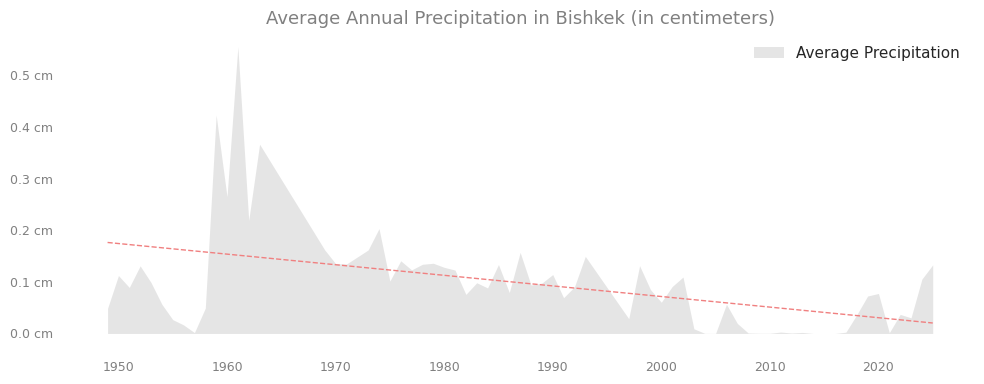

In [93]:
sns.set(style='white')

# Ensure numeric types and drop NaNs
weather_by_year = weather_by_year.copy()
weather_by_year = weather_by_year[pd.to_numeric(weather_by_year['YEAR'], errors='coerce').notnull()]
weather_by_year = weather_by_year[pd.to_numeric(weather_by_year['AvgPrecipCm'], errors='coerce').notnull()]
weather_by_year['YEAR'] = weather_by_year['YEAR'].astype(int)
weather_by_year['AvgPrecipCm'] = weather_by_year['AvgPrecipCm'].astype(float)

# --- 1. Average Precipitation Plot with Trajectory ---
fig, ax = plt.subplots(figsize=(10, 4))

ax.fill_between(
    weather_by_year['YEAR'],
    weather_by_year['AvgPrecipCm'],
    color='grey',
    alpha=0.2,
    label='Average Precipitation',
    linewidth=0
)

# Line and trend
sns.lineplot(
    data=weather_by_year,
    x='YEAR',
    y='AvgPrecipCm',
    color='grey',
    label='',
    errorbar=None,
    ax=ax,
    linewidth = 0
)
sns.regplot(
    data=weather_by_year,
    x='YEAR',
    y='AvgPrecipCm',
    scatter=False,
    color='lightcoral',
    ci=None,
    line_kws={'linestyle': '--', 'linewidth': 1},
    ax=ax
)

# Title and axis styling
ax.set_title('Average Annual Precipitation in Bishkek (in centimeters)', fontsize=13, color='grey')
ax.set_xlabel('', color='grey')
ax.set_ylabel('', color='grey')

# Remove spines for clean look
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

# Format ticks
ax.tick_params(axis='x', colors='grey', labelsize=9)
ax.tick_params(axis='y', colors='grey', labelsize=9)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f} cm'))

# Legend
ax.legend(frameon=False, loc='upper right')

# Layout
plt.tight_layout()
plt.show()


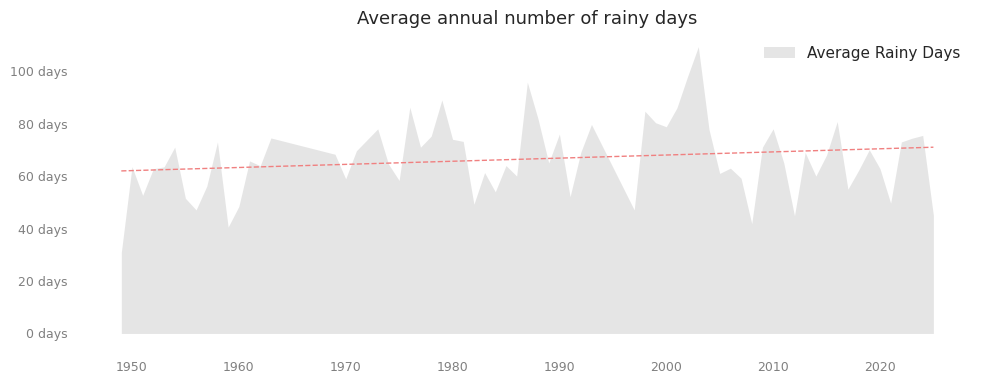

In [118]:
# --- 2. Average Rainy Days Plot with Trajectory ---

sns.set(style='white')

# Ensure numeric types and drop NaNs
weather_by_year['RainDaysCount'] = weather_by_year['AvgRainDays'] * 365

fig, ax = plt.subplots(figsize=(10, 4))
#plt.figure(figsize=(10, 4))

ax.fill_between(
    weather_by_year['YEAR'],
    weather_by_year['RainDaysCount'],
    color='grey',
    alpha=0.2,
    label='Average Rainy Days',
    linewidth=0
)

sns.regplot(
    data=weather_by_year,
    x='YEAR',
    y='RainDaysCount',
    scatter=False,
    ax = ax,
    color='lightcoral',
    ci = None,
    line_kws={'linestyle': '--', 'linewidth': 1}
)

# Remove the frame and axis
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

# Tick styling
ax.tick_params(axis='x', colors='grey', labelsize=9)
ax.tick_params(axis='y', colors='grey', labelsize=9)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f} days'))

# Clean Legend
ax.legend(frameon = False)

reg.lines[0].set_linestyle('--')
plt.title('Average annual number of rainy days', fontsize=13)
plt.xlabel('')
plt.ylabel('')
#plt.legend()

plt.tight_layout()
plt.show()





In [119]:
weather_by_year.head()

,YEAR,AvgPrecipCm,AvgSnowDays,AvgRainDays,SnowDaysCount,RainDaysCount
0,1949,0.048775,0.063380,0.084507,23.133803,30.845070
1,1950,0.112183,0.116129,0.174194,42.387097,63.580645
2,1951,0.089165,0.099502,0.144279,36.318408,52.661692
3,1952,0.130941,0.102151,0.172043,37.284946,62.795699
4,1953,0.098729,0.195652,0.173913,71.413043,63.478261


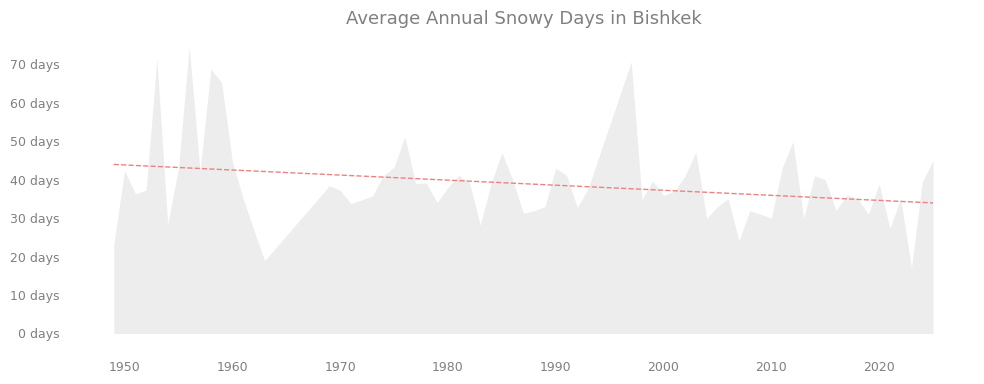

In [139]:
sns.set(style='white')

weather_by_year['SnowDaysCount'] = weather_by_year['AvgSnowDays'] * 365

# Plot actual number of snow days per year
fig, ax = plt.subplots(figsize=(10, 4))

# Fill the line
ax.fill_between(
    weather_by_year['YEAR'],
    weather_by_year['SnowDaysCount'],
    color='lightgrey',
    alpha=0.4,
    label='Average Snow Days',
    linewidth=0
)

# Trend line
sns.regplot(data=weather_by_year,
            x='YEAR',
            y='SnowDaysCount',
            color='lightcoral',
            ci=None,
            line_kws={'linestyle': '--', 'linewidth': 1},
            scatter=False,
            )
# Title and labels
ax.set_title('Average Annual Snowy Days in Bishkek', fontsize=13, color = 'grey')
ax.set_xlabel('', color='grey')
ax.set_ylabel('', color='grey')

# Remove all spines

for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

# Tick styling
ax.tick_params(axis='x', colors='grey', labelsize=9)
ax.tick_params(axis='y', colors='grey', labelsize=9)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f} days'))

#plt.legend()


plt.tight_layout()
plt.show()

